# NLP LAB1 Problem 1

## Data Preparation

## 1. Load input symbol sequence

In [2]:
import os
import torch
import matplotlib.pyplot as plt

In [3]:
def read_data(data_dir, is_train):
    data, labels = [], []
    
    if is_train:
        file_name = os.path.join(data_dir, 'simple_seq.train.csv')
        with open(os.path.join(file_name), 'rb') as f:
            file = f.read().decode('utf-8').replace('\r', '')
            content = file.split('\n')
            for line in content:
                line = line.strip(',')
                line_list = line.split(',')
                data.append(line_list[:-1])
                labels.append(line_list[-1])
        return data, labels
    else:
        file_name = os.path.join(data_dir, 'simple_seq.test.csv')
        with open(os.path.join(file_name), 'rb') as f:
            file = f.read().decode('utf-8').replace('\r', '')
            content = file.split('\n')
            for line in content:
                line = line.strip(',')
                line_list = line.split(',')
                data.append(line_list)
        return data

In [4]:
data_dir = './lab1-1_data'
train_x_list, train_y_list = read_data(data_dir, True) # train #: 900
train_x_list, train_y_list = train_x_list[:-1], train_y_list[:-1]
train_len = len(train_y_list)

test_x_list = read_data(data_dir, False) # test #: 100
test_x_list = test_x_list[:-1]
test_len = len(test_x_list)

## 2. Generate dictionary and transform all the symbol sequence into one-hot representation

In [5]:
import collections

dic = {}
whole_train_x_list = sum(train_x_list, [])

frequency_dic = collections.Counter(whole_train_x_list)
print(frequency_dic)
# print(dic.values())

Counter({'W24': 713, 'W13': 500, 'W32': 476, 'W12': 347, 'W38': 239, 'W28': 214, 'W17': 199, 'W19': 198, 'W97': 185, 'W47': 165, 'W110': 147, 'W111': 146, 'W45': 134, 'W87': 103, 'W90': 102, 'W122': 100, 'W113': 98, 'W112': 95, 'W26': 91, 'W494': 91, 'W46': 87, 'W461': 80, 'W36': 75, 'W2': 72, 'W516': 62, 'W154': 58, 'W34': 57, 'W93': 57, 'W4': 48, 'W434': 47, 'W1043': 47, 'W183': 46, 'W31': 42, 'W149': 40, 'W433': 40, 'W188': 39, 'W170': 37, 'W204': 34, 'W281': 34, 'W289': 33, 'W89': 32, 'W57': 30, 'W228': 30, 'W345': 30, 'W15': 29, 'W387': 29, 'W280': 28, 'W206': 27, 'W69': 27, 'W349': 25, 'W246': 24, 'W495': 24, 'W475': 24, 'W346': 23, 'W49': 22, 'W290': 22, 'W335': 22, 'W64': 20, 'W348': 20, 'W128': 19, 'W138': 19, 'W300': 19, 'W417': 19, 'W253': 19, 'W328': 18, 'W68': 18, 'W1206': 18, 'W334': 17, 'W526': 17, 'W627': 17, 'W130': 16, 'W1': 16, 'W337': 16, 'W457': 16, 'W66': 16, 'W70': 16, 'W385': 16, 'W383': 16, 'W367': 15, 'W408': 15, 'W787': 15, 'W626': 15, 'W910': 15, 'W55': 14, 

In [6]:
unique_words = list(set(whole_train_x_list)) # whole unique words len: 2546
print(unique_words)
print(len(unique_words))

['W227', 'W1413', 'W3872', 'W5212', 'W3530', 'W450', 'W1086', 'W215', 'W3214', 'W3410', 'W187', 'W1277', 'W726', 'W3539', 'W2144', 'W3319', 'W3874', 'W203', 'W2133', 'W2135', 'W679', 'W4126', 'W804', 'W78', 'W3162', 'W3671', 'W2750', 'W417', 'W3526', 'W3287', 'W3626', 'W756', 'W4204', 'W4180', 'W722', 'W5047', 'W4424', 'W5204', 'W324', 'W1213', 'W5245', 'W560', 'W32', 'W840', 'W4265', 'W1042', 'W3564', 'W62', 'W4172', 'W242', 'W7', 'W977', 'W2833', 'W661', 'W623', 'W3207', 'W3842', 'W3795', 'W3857', 'W5409', 'W5311', 'W1133', 'W5367', 'W630', 'W1010', 'W4778', 'W835', 'W2945', 'W122', 'W5028', 'W5426', 'W3761', 'W2228', 'W1843', 'W42', 'W1195', 'W5429', 'W2338', 'W3465', 'W2587', 'W3299', 'W2768', 'W1935', 'W4159', 'W1713', 'W3274', 'W3860', 'W4050', 'W2168', 'W457', 'W5214', 'W978', 'W2131', 'W2087', 'W438', 'W224', 'W4276', 'W1154', 'W5280', 'W3278', 'W3855', 'W5408', 'W3650', 'W1019', 'W981', 'W2964', 'W566', 'W4917', 'W3408', 'W3517', 'W4979', 'W3682', 'W2543', 'W1981', 'W2451', 'W

In [7]:
# make symbol sequence integer dictionary
word_dict = {'unknown': 0}
idx = 1
for string in unique_words:
    ###### 1. only store words whose frequency is more than 1 ######
    if frequency_dic[string] > 1: 
        word_dict[string] = idx
        idx += 1
    ###### 2. only store words whose frequency is more than 2 ######
    # if frequency_dic[string] > 2: 
    #     word_dict[string] = idx
    #     idx += 1
    ###### 3. store all words ######
    # word_dict[string] = idx # len: 2546
    # idx += 1
    ###### 4. only store words whose frequency is more than 3 ######
    # if frequency_dic[string] > 3: 
    #     word_dict[string] = idx
    #     idx += 1
    
len_symbol_sequence = len(word_dict) # len: 1076
print(word_dict)
print(len_symbol_sequence)

{'unknown': 0, 'W227': 1, 'W3530': 2, 'W1086': 3, 'W215': 4, 'W187': 5, 'W1277': 6, 'W203': 7, 'W2133': 8, 'W2135': 9, 'W679': 10, 'W804': 11, 'W78': 12, 'W3671': 13, 'W2750': 14, 'W417': 15, 'W3526': 16, 'W3287': 17, 'W722': 18, 'W5047': 19, 'W324': 20, 'W1213': 21, 'W560': 22, 'W32': 23, 'W840': 24, 'W62': 25, 'W4172': 26, 'W7': 27, 'W977': 28, 'W630': 29, 'W1010': 30, 'W835': 31, 'W122': 32, 'W3761': 33, 'W2228': 34, 'W42': 35, 'W1195': 36, 'W2587': 37, 'W3299': 38, 'W3860': 39, 'W457': 40, 'W978': 41, 'W2131': 42, 'W438': 43, 'W224': 44, 'W1154': 45, 'W566': 46, 'W2451': 47, 'W1198': 48, 'W87': 49, 'W90': 50, 'W409': 51, 'W2570': 52, 'W2344': 53, 'W418': 54, 'W430': 55, 'W1553': 56, 'W4352': 57, 'W666': 58, 'W36': 59, 'W580': 60, 'W299': 61, 'W6': 62, 'W2061': 63, 'W1192': 64, 'W505': 65, 'W1203': 66, 'W1515': 67, 'W507': 68, 'W120': 69, 'W1074': 70, 'W2009': 71, 'W844': 72, 'W388': 73, 'W4251': 74, 'W1399': 75, 'W1818': 76, 'W731': 77, 'W2242': 78, 'W328': 79, 'W88': 80, 'W104': 8

In [8]:
# import pickle

# with open('word_dict_1.pickle','wb') as fw:
#     pickle.dump(word_dict, fw)

In [9]:
# transform all the symbol sequence into one-hot representation
zero_vec = torch.zeros(len_symbol_sequence)
zero_vec[0] = 1
one_hot_dict = {'unknown': zero_vec}

for key, value in word_dict.items():
    one_hot_key = torch.zeros(len_symbol_sequence)
    one_hot_key[value] = 1
    one_hot_dict[key] = one_hot_key

print(one_hot_dict)
print(len(one_hot_dict))

{'unknown': tensor([1., 0., 0.,  ..., 0., 0., 0.]), 'W227': tensor([0., 1., 0.,  ..., 0., 0., 0.]), 'W3530': tensor([0., 0., 1.,  ..., 0., 0., 0.]), 'W1086': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'W215': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'W187': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'W1277': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'W203': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'W2133': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'W2135': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'W679': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'W804': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'W78': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'W3671': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'W2750': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'W417': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'W3526': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'W3287': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'W722': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'W5047': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'W324': tensor([0., 0., 0.,

### Transform list data into tensor value using word_dict

In [10]:
category_dict = {'D1': 0, 'D3': 1, 'D4': 2, 'D5': 3, 'D6': 4, 'D7': 5, 'D11': 6, 'D12': 7, 'D13': 8, 'D15': 9, 'D16': 10,
                 'D17': 11, 'D18': 12, 'D19': 13, 'D20': 14, 'D21': 15, 'D27': 16, 'D28': 17, 'D32': 18}
dict_category = {0: 'D1', 1: 'D3', 2: 'D4', 3: 'D5', 4: 'D6', 5: 'D7', 6: 'D11', 7: 'D12', 8: 'D13', 9: 'D15', 10: 'D16',
                 11: 'D17', 12: 'D18', 13: 'D19', 14: 'D20', 15: 'D21', 16: 'D27', 17: 'D28', 18: 'D32'}

In [11]:
train_y = torch.zeros(train_len, 19) # torch tensor (900, )
for idx, value in enumerate(train_y_list):
    tmp = torch.zeros(19)
    tmp[category_dict[value]] = 1
    train_y[idx] = tmp
print(train_y)
print(train_y.shape)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
torch.Size([900, 19])


## 3. Vectorize symbol sequence & 4. Padding(set different input length being same: add zero vector)

In [12]:
train_x = torch.zeros((train_len, 20, len_symbol_sequence)) # (900, 20, 1076), maximum_length of sequence was given to be 20.
print(train_x.shape)

torch.Size([900, 20, 1076])


### Transform train input's symbol sequence into one-hot vector tensor

In [13]:
def word_to_vec(sequence):
    if len(sequence) > 20:
        sequence = sequence[:20]
    elif len(sequence) < 20:
        tmp = ['unknown'] * (20 - len(sequence))
        sequence.extend(tmp)

    res = torch.zeros((20, len_symbol_sequence))
    
    for i in range(20):
        if sequence[i] in one_hot_dict: # if this word is in the word dictionary,
            res[i] = one_hot_dict[sequence[i]]
        else: # if this word's frequency is 1 so excluded from word dictionary,
            res[i] = one_hot_dict['unknown']
    
    return res

In [14]:
# make final train_x tensor

for idx, sequence in enumerate(train_x_list):
    train_x[idx] = word_to_vec(sequence)

In [15]:
print(train_x)
print(train_x.shape)

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.]],

        [[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0., 

### Make test data's symbol sequence into one-hot vector embedding

In [16]:
test_x = torch.zeros((test_len, 20, len_symbol_sequence)) # (100, 20, 1076)
print(test_x.shape)

torch.Size([100, 20, 1076])


In [17]:
# make final test_x tensor

for idx, sequence in enumerate(test_x_list):
    test_x[idx] = word_to_vec(sequence)

In [18]:
print(test_x)
print(test_x.shape)

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.]],

        [[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.]],

        [[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0., 

## 5. Design 3-layer feedforward network

In [19]:
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init
import math
import torch.optim as optim
import torch.utils.data as data
from sklearn.metrics import average_precision_score

In [20]:
class MyModel(nn.Module):
    def __init__(self, in_features, num_hid1, num_hid2, dropout):
        super(MyModel, self).__init__()
        
        # self.weight_1 = nn.Parameter(nn.init.kaiming_uniform_(torch.empty(num_hid1, in_features))) # He initialization
        self.weight_1 = nn.Parameter(nn.init.xavier_uniform_(torch.empty(num_hid1, in_features))) # Xavier initialization
        self.bias_1 = nn.Parameter(torch.empty(num_hid1))
        fan_in, _ = init._calculate_fan_in_and_fan_out(self.weight_1)
        bound = 1 / math.sqrt(fan_in) if fan_in > 0 else 0
        init.uniform_(self.bias_1, -bound, bound)

        # self.weight_2 = nn.Parameter(nn.init.kaiming_uniform_(torch.empty(num_hid2, num_hid1)))
        self.weight_2 = nn.Parameter(nn.init.xavier_uniform_(torch.empty(num_hid2, num_hid1))) # Xavier initialization
        self.bias_2 = nn.Parameter(torch.empty(num_hid2))
        fan_in, _ = init._calculate_fan_in_and_fan_out(self.weight_2)
        bound = 1 / math.sqrt(fan_in) if fan_in > 0 else 0
        init.uniform_(self.bias_2, -bound, bound)

        # self.weight_3 = nn.Parameter(nn.init.kaiming_uniform_(torch.empty(19, num_hid2)))
        self.weight_3 = nn.Parameter(nn.init.xavier_uniform_(torch.empty(19, num_hid2))) # Xavier initialization
        self.bias_3 = nn.Parameter(torch.empty(19))
        fan_in, _ = init._calculate_fan_in_and_fan_out(self.weight_3)
        bound = 1 / math.sqrt(fan_in) if fan_in > 0 else 0
        init.uniform_(self.bias_3, -bound, bound)

        self.bn_1 = nn.BatchNorm1d(num_hid1)
        self.bn_2 = nn.BatchNorm1d(num_hid2)
        self.dropout = nn.Dropout(dropout)

        self.sigmoid_function = nn.Sigmoid()
        # self.relu_function = nn.ReLU()
        # self.leaky_relu_function = nn.LeakyReLU()
    
    def forward(self, inputs):
        # inputs: (batch_size, max_length * 1076)

        out = torch.mm(inputs, self.weight_1.T) + self.bias_1
        out = self.bn_1(out)
        out = self.sigmoid_function(out)
        # out = self.leaky_relu_function(out)
        # out = self.relu_function(out)
        out = self.dropout(out)

        out = torch.mm(out, self.weight_2.T) + self.bias_2
        out = self.bn_2(out)
        out = self.sigmoid_function(out)
        # out = self.leaky_relu_function(out)
        # out = self.relu_function(out)
        out = self.dropout(out)

        out = torch.mm(out, self.weight_3.T) + self.bias_3

        return out

In [21]:
# Define Model
input_size = len_symbol_sequence * 20
num_hid1 = 1000
num_hid2 = 100
dropout = 0.1

model = MyModel(input_size, num_hid1, num_hid2, dropout)

In [22]:
lr = 0.02
weight_decay = 0.99
batch_size = 30
num_epochs = 10
exp_num = 34

# Optimizer: Stochastic Gradient Descent
# optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay)
optimizer = optim.Adam(model.parameters(), lr=lr)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("device: ", device)

# Learning rate scheduler: CosineAnnealingLR
# scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, 1, eta_min=0, last_epoch=-1)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.95)
# scheduler = optim.lr_scheduler.LambdaLR(optimizer=optimizer,
#                                         lr_lambda=lambda epoch: 0.95 ** epoch,
#                                         last_epoch=-1,
#                                         verbose=False)

# Loss: Cross-Entropy Loss
criterion = nn.CrossEntropyLoss()

device:  cuda


In [23]:
class MyDataset(data.Dataset):
    def __init__(self, x_tensor, y_tensor):
        super(MyDataset, self).__init__()

        self.x = x_tensor
        self.y = y_tensor

    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [24]:
my_dataset = MyDataset(train_x, train_y)

train_size = int(0.9 * len(my_dataset))
test_size = len(my_dataset) - train_size

train_dataset, valid_dataset = torch.utils.data.random_split(my_dataset, [train_size, test_size])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle = True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, shuffle = False)

### train

In [25]:
def get_ap_score(y_true, y_scores):
    """
    Get average precision score between 2 1-d numpy arrays
    Args:
        y_true: batch of true labels
        y_scores: batch of confidence scores

    Returns:
        sum of batch average precision
    """
    scores = 0.0

    for i in range(y_true.shape[0]):
        scores += average_precision_score(y_true=y_true[i], y_score=y_scores[i])

    return scores

In [26]:
train_loss_list, train_acc_list, val_loss_list, val_acc_list = [], [], [], []
best_val_acc = 0.0

for epoch in range(num_epochs):
    train_loss = 0.0
    train_acc = 0.0
    val_loss = 0.0
    val_acc = 0.0

    model = model.to(device)

    ############### Training Phase #############
    for idx, (tr_data, tr_label) in enumerate(train_loader):
        # data: (10, 20, 1076), label: (10, )
        tr_data = tr_data.flatten(1, 2).to(device) # tr_data: (10, 20 * 1076)
        tr_label = tr_label.to(device)

        model.train()
        optimizer.zero_grad()

        tr_output = model(tr_data)

        tr_loss = criterion(tr_output, tr_label)
        tr_loss.backward()
        optimizer.step()
        scheduler.step()

        train_loss += tr_loss.item()
        train_acc += get_ap_score(torch.Tensor.cpu(tr_label).detach().numpy(),
                                    torch.Tensor.cpu(tr_output).detach().numpy())
    
    train_num_samples = float(len(train_loader.dataset))
    tr_loss_ = train_loss / train_num_samples
    tr_acc_ = train_acc / train_num_samples

    train_loss_list.append(tr_loss_)
    train_acc_list.append(tr_acc_)
    
    ############### Evaluation Phase #############
    for idx, (val_data, val_label) in enumerate(valid_loader):
        val_data = val_data.flatten(1, 2).to(device)
        val_label = val_label.to(device)

        model.eval()

        vl_output = model(val_data)

        vl_loss = criterion(vl_output, val_label)
        val_loss += vl_loss.item()
        val_acc += get_ap_score(torch.Tensor.cpu(val_label).detach().numpy(),
                                    torch.Tensor.cpu(vl_output).detach().numpy())
        
    
    valid_num_samples = float(len(valid_loader.dataset))
    val_loss_ = val_loss / valid_num_samples
    val_acc_ = val_acc / valid_num_samples

    val_loss_list.append(val_loss_)
    val_acc_list.append(val_acc_)

    print('\nEpoch {}, train_loss: {:.4f}, train_acc:{:.3f}, valid_loss: {:.4f}, valid_acc:{:.3f}'.format(epoch, tr_loss_, tr_acc_, val_loss_, val_acc_))
    if val_acc_ > best_val_acc:
        best_val_acc = val_acc_
        torch.save(model.state_dict(), f'./lab1-1_parameters/model_{exp_num}.pth')
        print(f'Epoch {epoch} model saved')


Epoch 0, train_loss: 0.0683, train_acc:0.546, valid_loss: 0.0578, valid_acc:0.628
Epoch 0 model saved

Epoch 1, train_loss: 0.0360, train_acc:0.819, valid_loss: 0.0567, valid_acc:0.661
Epoch 1 model saved

Epoch 2, train_loss: 0.0293, train_acc:0.867, valid_loss: 0.0561, valid_acc:0.671
Epoch 2 model saved

Epoch 3, train_loss: 0.0280, train_acc:0.872, valid_loss: 0.0561, valid_acc:0.658

Epoch 4, train_loss: 0.0274, train_acc:0.876, valid_loss: 0.0559, valid_acc:0.660

Epoch 5, train_loss: 0.0268, train_acc:0.885, valid_loss: 0.0559, valid_acc:0.659

Epoch 6, train_loss: 0.0268, train_acc:0.885, valid_loss: 0.0559, valid_acc:0.655

Epoch 7, train_loss: 0.0269, train_acc:0.888, valid_loss: 0.0559, valid_acc:0.660

Epoch 8, train_loss: 0.0270, train_acc:0.882, valid_loss: 0.0559, valid_acc:0.666

Epoch 9, train_loss: 0.0273, train_acc:0.889, valid_loss: 0.0557, valid_acc:0.661


### Visualize train, valid loss and accuracy

In [27]:
epoch_list = list(range(num_epochs))

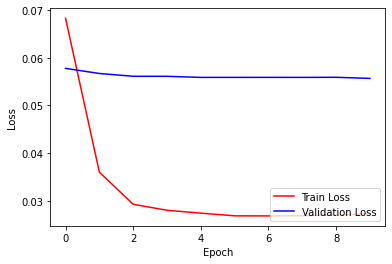

In [28]:
plt.plot(epoch_list, train_loss_list, 'r', label = 'Train Loss')
plt.plot(epoch_list, val_loss_list, 'b', label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
# plt.show()
plt.savefig(f'./lab1-1_submissions/exp{exp_num}_sch_bn_loss_graph.png')

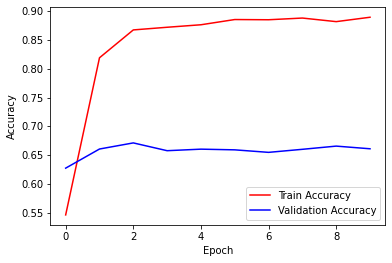

In [29]:
plt.plot(epoch_list, train_acc_list, 'r', label = 'Train Accuracy')
plt.plot(epoch_list, val_acc_list, 'b', label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
# plt.show()
plt.savefig(f'./lab1-1_submissions/exp{exp_num}_acc_graph.png')

### test

In [30]:
test_model = MyModel(input_size, num_hid1, num_hid2, dropout).to(device)
PATH = f'./lab1-1_parameters/model_{exp_num}.pth'
print(PATH)
test_model.load_state_dict(torch.load(PATH))

./lab1-1_parameters/model_34.pth


<All keys matched successfully>

In [31]:
test_y = test_model(test_x.to(device).flatten(1,2)).argmax(dim=1)
print(test_y.shape)

torch.Size([100])


In [32]:
print(test_y)

tensor([14, 14,  7, 14, 14, 14,  7,  7,  9, 14,  9, 14, 14,  9,  9, 14, 14,  9,
         9,  9, 14,  7,  0, 14, 14, 14,  0,  9, 14, 14,  9, 17, 17,  7,  7,  7,
         0,  0,  9,  7, 14,  9,  7, 14, 14,  7,  9,  0, 14, 14, 14,  7,  7,  7,
         9,  0, 14, 14,  7,  7,  7,  9,  9,  0, 14,  7,  0, 14, 14, 14,  9,  0,
         7,  7, 14,  7,  9, 14,  7, 14,  7,  0, 14,  0,  0, 14,  0,  7,  0, 17,
        17, 14,  7,  7,  7,  7,  9, 14,  7,  9], device='cuda:0')


In [33]:
submission = ['id,pred\n']

f2 = './lab1-1_data/submission_example.csv'

In [34]:
with open(f2, 'rb') as f:
    file = f.read().decode('utf-8')
    content = file.split('\n')[:-1] # 101 (column name included)

    for idx, line in enumerate(content):
        if idx == 0:
            continue
        tmp1 = line.split(',')
        result = dict_category[test_y[idx-1].item()]
        tmp2 = tmp1[0] + ',' + str(result) + '\n'
        submission.append(tmp2)

In [35]:
print(submission)

['id,pred\n', 'S001,D20\n', 'S002,D20\n', 'S003,D12\n', 'S004,D20\n', 'S005,D20\n', 'S006,D20\n', 'S007,D12\n', 'S008,D12\n', 'S009,D15\n', 'S010,D20\n', 'S011,D15\n', 'S012,D20\n', 'S013,D20\n', 'S014,D15\n', 'S015,D15\n', 'S016,D20\n', 'S017,D20\n', 'S018,D15\n', 'S019,D15\n', 'S020,D15\n', 'S021,D20\n', 'S022,D12\n', 'S023,D1\n', 'S024,D20\n', 'S025,D20\n', 'S026,D20\n', 'S027,D1\n', 'S028,D15\n', 'S029,D20\n', 'S030,D20\n', 'S031,D15\n', 'S032,D28\n', 'S033,D28\n', 'S034,D12\n', 'S035,D12\n', 'S036,D12\n', 'S037,D1\n', 'S038,D1\n', 'S039,D15\n', 'S040,D12\n', 'S041,D20\n', 'S042,D15\n', 'S043,D12\n', 'S044,D20\n', 'S045,D20\n', 'S046,D12\n', 'S047,D15\n', 'S048,D1\n', 'S049,D20\n', 'S050,D20\n', 'S051,D20\n', 'S052,D12\n', 'S053,D12\n', 'S054,D12\n', 'S055,D15\n', 'S056,D1\n', 'S057,D20\n', 'S058,D20\n', 'S059,D12\n', 'S060,D12\n', 'S061,D12\n', 'S062,D15\n', 'S063,D15\n', 'S064,D1\n', 'S065,D20\n', 'S066,D12\n', 'S067,D1\n', 'S068,D20\n', 'S069,D20\n', 'S070,D20\n', 'S071,D15\n', 

In [36]:
with open(f'./lab1-1_submissions/lab1-1_submission{exp_num}.csv', 'w') as f:
    f.write(''.join(submission))